<a href="https://www.kaggle.com/code/avikumart/pca-principal-component-analysis-variance-plots?scriptVersionId=116394793" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

> Principal component analysis is a dimention reduction technique that finds the variance maximizing directions onto which to project the data.

> Eigenvalue, eigenvector--
Given a matrix A\in\mathbb{R}^{n\times n}A∈R 
n×n
 , \lambdaλ is said to be an eigenvalue of AA if there exists a vector z\in\mathbb{R}^n\backslash\{0\}z∈R 
n
 \{0}, called eigenvector.
 
 > Principal components are calculated to reduce variance of features and thus reducing dimentionality of features


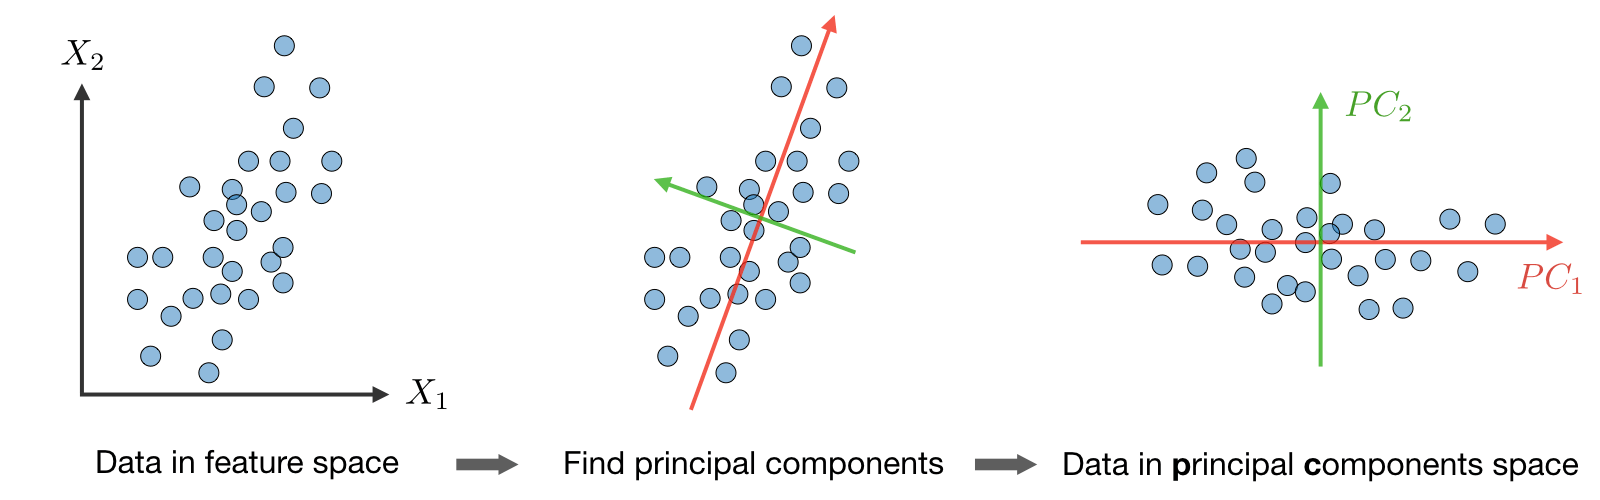

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression

# matplotlib defaults

plt.style.use("seaborn-darkgrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv


In [2]:
ford = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv')
ford

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [3]:
# variance among numircal features
ford.var()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


year          4.203918e+00
price         2.248071e+07
mileage       3.791633e+08
tax           3.845294e+03
mpg           1.025354e+02
engineSize    1.869450e-01
dtype: float64

# Plotting continues numerical features

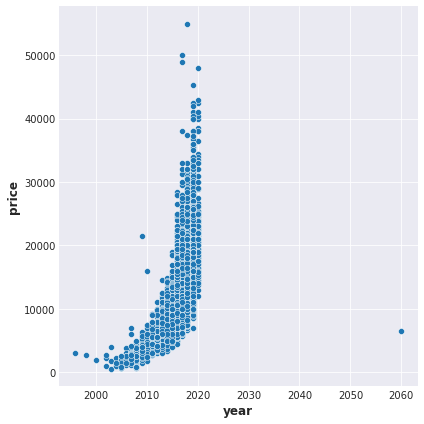

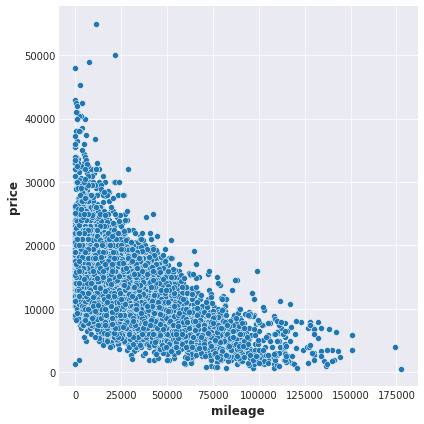

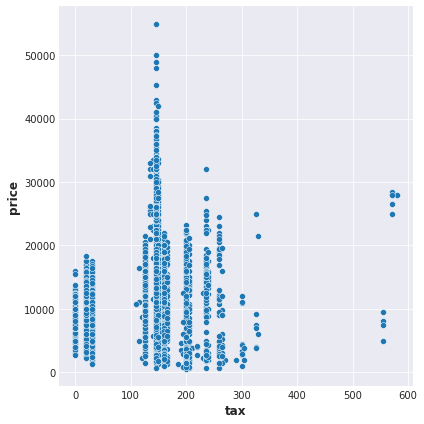

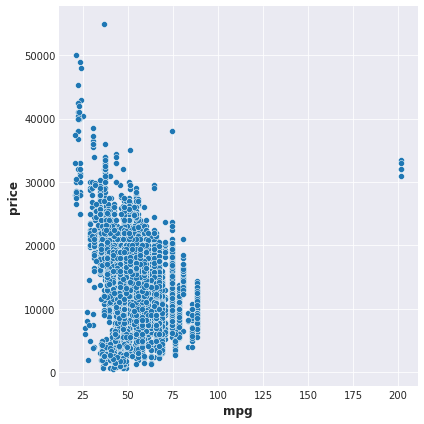

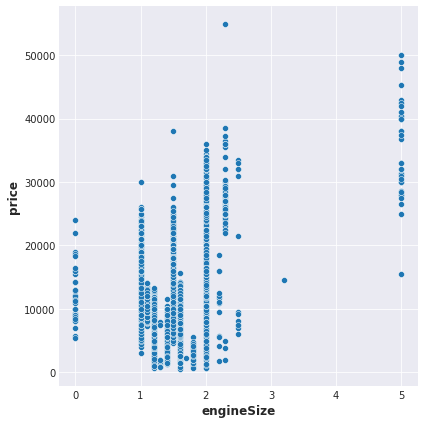

In [4]:
y = ford['price']
ford_ = ford.drop('price', axis=1)

cols = [col for col in ford_.columns if ford_[col].dtype in ['int64','float64']]

for idx, col in enumerate(cols):
    plt.figure(idx, figsize=(6,6))
    sns.scatterplot(x=col, y=y, data=ford_)
    plt.show

> As per above plots there are some outliears in in dataset which can affect model performance

> We can mileage feature having largest varince among all features

> We will do principal component analysis on this features to reduce variance and and reduce effects  of outliears

# PCA object

In [14]:
features = ['mileage','year','mpg','tax','engineSize']

X = ford_[features]

# normalizing features

X_norm = (X - X.mean(axis=0))/X.std(axis=0)

# principal component analysis on features

pca = PCA()

X_pca = pca.fit_transform(X_norm)

# converting to dataframe
names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

X_pcadf = pd.DataFrame(X_pca, columns=names)


print(X_pcadf.head())
print("+++++++++++++++++++++++++++++++++++++++++++++++++++")
print("shape of pca df:", X_pcadf.shape)

        PC1       PC2       PC3       PC4       PC5
0  0.575611 -0.368421 -0.708761  0.371575 -0.224397
1  1.059305 -0.623569 -0.499118  0.275858 -0.125147
2  0.679683 -0.423364 -0.687725  0.308659 -0.342023
3  1.771358  0.858840 -0.159534 -0.833414  0.574171
4  1.810537 -0.426270 -0.659147 -0.402589  0.187178
+++++++++++++++++++++++++++++++++++++++++++++++++++
shape of pca df: (17965, 5)


In [30]:
pca.singular_values_

array([189.10834173, 167.05350962, 113.43209754,  92.58589638,
        68.64525512])

# Plotting explained variance ratio

[0.39815147 0.31069779 0.1432514  0.09543697 0.05246238]


<function matplotlib.pyplot.show(close=None, block=None)>

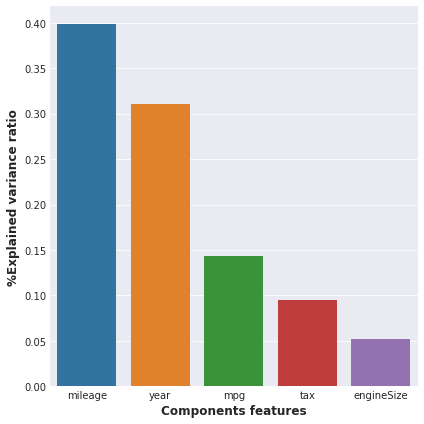

In [6]:
evr = pca.explained_variance_ratio_
print(evr)
features = ['mileage','year','mpg','tax','engineSize']
    
    
plt.figure(figsize=(6,6))
sns.barplot(x=np.array(features), y=evr)
plt.xlabel("Components features")
plt.ylabel("%Explained variance ratio")
plt.show

> Reduced variances of each features after dimentionality reduction

# Plotting explained variance

[1.99075734 1.55348893 0.716257   0.47718483 0.2623119 ]


<function matplotlib.pyplot.show(close=None, block=None)>

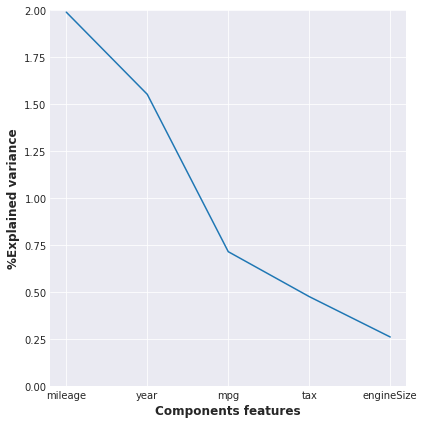

In [7]:
ev = pca.explained_variance_
print(ev)

features = ['mileage','year','mpg','tax','engineSize']


plt.figure(figsize=(6,6))
sns.lineplot(x=np.array(features), y=ev)
plt.xlabel("Components features")
plt.ylabel("%Explained variance")
plt.ylim(0,2)
plt.show

# Plotting Cummulative explained variance

[1.99075734 3.54424627 4.26050327 4.7376881  5.        ]


<function matplotlib.pyplot.show(close=None, block=None)>

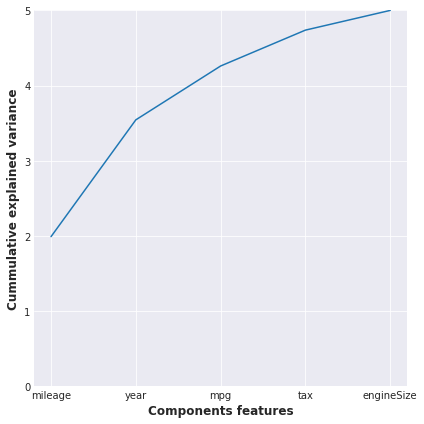

In [8]:
evc = np.cumsum(pca.explained_variance_)
print(evc)

features = ['mileage','year','mpg','tax','engineSize']


plt.figure(figsize=(6,6))
sns.lineplot(x=np.array(features), y=evc)
plt.xlabel("Components features")
plt.ylabel("Cummulative explained variance")
plt.ylim(0,5)
plt.show

> Cummulative variance is at about 5 

In [9]:
loadings = pd.DataFrame(pca.components_.T , 
                        index=np.array(features), 
                        columns=names)

loadings

,PC1,PC2,PC3,PC4,PC5
mileage,-0.580994,0.306726,-0.117437,0.351235,0.656664
year,0.572008,-0.301552,0.344999,0.057492,0.677896
mpg,-0.319856,-0.558115,0.439733,0.574365,-0.250878
tax,0.481602,0.396237,-0.207135,0.730287,-0.186634
engineSize,-0.031681,0.588634,0.794301,-0.100574,-0.107133


In [10]:
pca.noise_variance_

0.0

In [11]:
# covariance matrix of principal components
pca.get_covariance()

array([[ 1.        , -0.70789926,  0.12007683, -0.26055045,  0.2150014 ],
       [-0.70789926,  1.        , -0.02296881,  0.29845652, -0.13735825],
       [ 0.12007683, -0.02296881,  1.        , -0.50301254, -0.26052712],
       [-0.26055045,  0.29845652, -0.50301254,  1.        ,  0.18431146],
       [ 0.2150014 , -0.13735825, -0.26052712,  0.18431146,  1.        ]])

In [12]:
y = ford['price']

mi_score = mutual_info_regression(X_pcadf,y, discrete_features=False)
mi_score = pd.Series(mi_score, index=X_pcadf.columns, name="MI_SCORE")

print(mi_score)

PC1    0.537105
PC2    0.342362
PC3    0.337088
PC4    0.238274
PC5    0.110110
Name: MI_SCORE, dtype: float64


> As we can see after PCA, PC1 which has a higest explained varience among all features has the most feature imporatance to predict target variable

## **THANK YOU FOR VISTING THIS NOTEBOOK!**